<a href="https://colab.research.google.com/github/kub522/gsdgf/blob/main/Genomic%20Sequence%20Analysis%20Final%20Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 35.3 MB/s eta 0:00:00


In [2]:
# Basic imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from Bio import SeqIO
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
Chrom15 = '/content/drive/MyDrive/COMP351/Chrom15.fasta'    # Seq for Chromosome 15 without albinism
Alb = '/content/drive/MyDrive/COMP351/Alb.fasta'      # Seq for Albinism

df = SeqIO.parse(Chrom15, "fasta") # Using Biopython, we can parse through the fasta file which contains the sequence for chromosome 15
dg = SeqIO.parse(Alb, "fasta") # Using Biopython, we can parse through the fasta file which contains the sequence for Albinism


In [5]:
for record in dg: #loop to print the ALb fasta out in 50 character long lines
  Albseq_str = record.seq
  for i in range(0, len(Albseq_str)):
    print(Albseq_str[i:i])

In [6]:
Albseq_char_array = list(str(Albseq_str))
display(Albseq_char_array[:])
print(f"Total number of characters: {len(Albseq_char_array)}")

['A',
 'A',
 'T',
 'C',
 'C',
 'T',
 'C',
 'C',
 'T',
 'C',
 'T',
 'T',
 'C',
 'T',
 'C',
 'C',
 'C',
 'T',
 'T',
 'C',
 'C',
 'T',
 'G',
 'A',
 'A',
 'G',
 'C',
 'T',
 'G',
 'C',
 'A',
 'C',
 'G',
 'C',
 'T',
 'G',
 'C',
 'A',
 'G',
 'T',
 'A',
 'A',
 'G',
 'A',
 'G',
 'C',
 'A',
 'C',
 'A',
 'G',
 'C',
 'A',
 'G',
 'A',
 'A',
 'A',
 'T',
 'G',
 'C',
 'A',
 'G',
 'A',
 'C',
 'A',
 'A',
 'A',
 'A',
 'G',
 'G',
 'G',
 'G',
 'G',
 'C',
 'C',
 'A',
 'A',
 'A',
 'C',
 'A',
 'T',
 'G',
 'G',
 'G',
 'C',
 'G',
 'A',
 'G',
 'A',
 'A',
 'G',
 'G',
 'G',
 'C',
 'T',
 'C',
 'T',
 'G',
 'T',
 'T',
 'G',
 'C',
 'T',
 'C',
 'G',
 'G',
 'C',
 'A',
 'T',
 'C',
 'C',
 'T',
 'G',
 'T',
 'G',
 'G',
 'G',
 'C',
 'C',
 'A',
 'C',
 'T',
 'G',
 'C',
 'A',
 'C',
 'A',
 'T',
 'C',
 'T',
 'G',
 'C',
 'C',
 'T',
 'C',
 'T',
 'C',
 'T',
 'C',
 'A',
 'G',
 'G',
 'G',
 'A',
 'C',
 'C',
 'T',
 'C',
 'C',
 'C',
 'T',
 'G',
 'C',
 'C',
 'C',
 'C',
 'A',
 'A',
 'C',
 'G',
 'T',
 'C',
 'T',
 'C',
 'C',
 'C',
 'A',
 'A'

Total number of characters: 1879


In [7]:
for record in df: #loop to print the Chrom15 fasta out in 50 character long lines
  Chrom15seq_str = record.seq     #WARNING MUCH LONGER
  for i in range(0, len(Chrom15seq_str), 50):
    print(Chrom15seq_str[i:i+50])

TTCCCAACAGGATCTCCCACCAGCCCAGCTTTTCTGTATAGGCTCCGGCC
TCTGCTCATCCAAGGTAAGCGGTAGCCTCTGAGGTTGGAGGATGGAGAAG
GTGGAATCAGGCCAATTGAAAAGGACAGCCAGGCTGCCATTTCTCTAGAA
TCAAAATGGAGGTTGTGGAGTACGGGATCCCTGAGTTCTCTCCGAGCTTC
TTGGGTAGCCTGAATAAATACTTGCCCCCAAGGATGGACCTCAGCTGTCC
CTCAGATGGAGCTGAGAGGTAGAGCCATATGTCTGTGGAGGTCTATTGGT
TCTATCAGGGGAGCAGAAGGCAGAGGGTGAGAGGCAAGCACTTGGGTGAG
GAGTTGATTGGCTAAGCCAACAACATGCATGCTTCGCTGAGGATGTCCCA
GTGAGGGGACTCAGCAGCAGAGGGAGGAGCAAGGGGAATGGTGAGAACCT
TTACCATAAGAGCCAGTATGTGGCTCAGACGCACTGTAGGACTGAGGTTG
GGGCATGAGAAAGGATATCTAAGAGGTTTACAGCACACTAAGTCACACCA
ATAAGCTGACCCTGCTCTGCCTCTGCCTCCATATGGATGGGTCTTCGGGC
ATTTAGAGACTCCAGGCTCACTATAGCACAAGGGTCTCCAGTTGGAGAAA
CAGATGCTGTAACTGGGGCCACAGTATAAAGAGAGCCCAGACATTGAACT
GTCAACACAGAAGCCTGGCACACTGGAACTGGCAGTCCAGCTGGGAACAA
GGGGTAGAGGCTGAGGCCACTAAGTCAACTGAGGCAGGAGACATAGGAGC
TAAAGCAGCTGAAGGGTGCAGGACAGCTGGGGGGTCTGAAGTGGGCCTCA
TGCCCAGAGCTATGAAGTCAGGGGCTGTAGCCTAGGAGCCTTGGAAGCCA
GCTGGCAAGCTGTGGCCCAAAGACGCTGACTCACCAGGAGGGGGCAGCTG
GAGCCAGGCACTCCTAAGGTTTCCAGGAAGG

In [8]:
segment_length = 2
texts = [Albseq_str[i:i+segment_length] for i in range(0, len(Albseq_str), segment_length)]

# Generate labels to match the new length of texts
labels = []
for i in range(len(texts)):   # loop to make labels the same length as text
    labels.append(1 if i % 2 == 0 else 0)

df = pd.DataFrame({"text": texts, "label": labels})

print(df.shape)
print(df['label'].value_counts())

(940, 2)
label
1    470
0    470
Name: count, dtype: int64


In [9]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X_train, X_test, y_train, y_test = train_test_split(
    df["text"],
    df["label"],
    test_size=0.2,
    random_state=42,
    stratify=df["label"]
)

print("Train size:", len(X_train), "Test size:", len(X_test))



Train size: 752 Test size: 188


In [10]:
# BoW: convert text into token counts

#  need to convert Bio.Seq components to strings
X_train_str = X_train.astype(str)
X_test_str = X_test.astype(str)

bow_vec = CountVectorizer(analyzer='char', ngram_range=(1,1)) # Utilized N grams to help parse the data
X_train_bow = bow_vec.fit_transform(X_train_str)
X_test_bow  = bow_vec.transform(X_test_str)

In [11]:
# Show the BoW feature names
bow_feature_names = bow_vec.get_feature_names_out()
print("BoW feature names:", bow_feature_names)

# Convert a small slice of the sparse matrix to a dense DataFrame for illustration
bow_df = pd.DataFrame(
    X_train_bow.toarray(),
    columns=bow_feature_names
)
bow_df.head()


BoW feature names: ['a' 'c' 'g' 't']


,a,c,g,t
0,0,1,0,1
1,1,1,0,0
2,1,1,0,0
3,1,0,0,1
4,0,1,1,0


In [12]:
#BOW Accuracy Block
bow_clf = LogisticRegression(max_iter=5000)
bow_clf.fit(X_train_bow, y_train)
y_pred_bow = bow_clf.predict(X_test_bow)

print("\nBoW accuracy:", accuracy_score(y_test, y_pred_bow))
print(classification_report(y_test, y_pred_bow))



BoW accuracy: 0.43617021276595747
              precision    recall  f1-score   support

           0       0.45      0.63      0.53        94
           1       0.40      0.24      0.30        94

    accuracy                           0.44       188
   macro avg       0.43      0.44      0.41       188
weighted avg       0.43      0.44      0.41       188



In [13]:

# TF–IDF: weighted version of BoW
tfidf_vec = TfidfVectorizer(analyzer='char', ngram_range=(2,2)) # ngram dimensions of 2x2
X_train_tfidf = tfidf_vec.fit_transform(X_train_str)
X_test_tfidf  = tfidf_vec.transform(X_test_str)

print("Vocabulary size (TF–IDF):", len(tfidf_vec.vocabulary_))
print("TF–IDF train matrix shape:", X_train_tfidf.shape)

Vocabulary size (TF–IDF): 16
TF–IDF train matrix shape: (752, 16)


In [14]:
# Show the TF-IDF feature names
tfidf_feature_names = tfidf_vec.get_feature_names_out()
print("TF-IDF feature names:", tfidf_feature_names)

# Convert the sparse TF-IDF matrix to a dense DataFrame for visualization
tfidf_df = pd.DataFrame(
    X_train_tfidf.toarray(),
    columns=tfidf_feature_names
)

tfidf_df.head()


TF-IDF feature names: ['aa' 'ac' 'ag' 'at' 'ca' 'cc' 'cg' 'ct' 'ga' 'gc' 'gg' 'gt' 'ta' 'tc'
 'tg' 'tt']


,aa,ac,ag,at,ca,cc,cg,ct,ga,gc,gg,gt,ta,tc,tg,tt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
tfidf_clf = LogisticRegression(max_iter=5000)
tfidf_clf.fit(X_train_tfidf, y_train)
y_pred_tfidf = tfidf_clf.predict(X_test_tfidf)

print("\nTF–IDF accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf))


TF–IDF accuracy: 0.44148936170212766
              precision    recall  f1-score   support

           0       0.43      0.34      0.38        94
           1       0.45      0.54      0.49        94

    accuracy                           0.44       188
   macro avg       0.44      0.44      0.44       188
weighted avg       0.44      0.44      0.44       188



BoW accuracy:    0.43617021276595747
TF–IDF accuracy: 0.44148936170212766


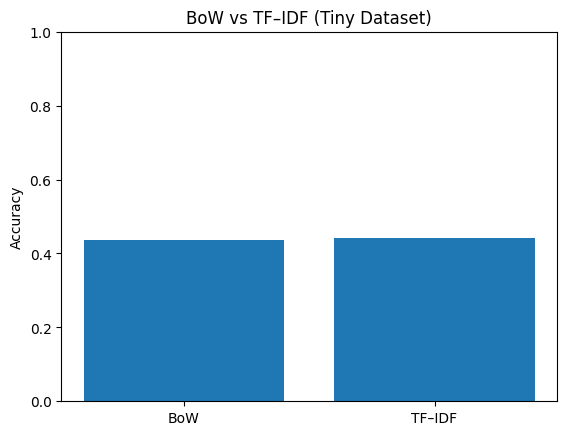

In [16]:
acc_bow = accuracy_score(y_test, y_pred_bow)
acc_tfidf = accuracy_score(y_test, y_pred_tfidf)

print("BoW accuracy:   ", acc_bow)
print("TF–IDF accuracy:", acc_tfidf)

methods = ["BoW", "TF–IDF"]
accs = [acc_bow, acc_tfidf]

plt.bar(methods, accs)
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("BoW vs TF–IDF (Tiny Dataset)")
plt.show()
